In [1]:
import gaussian_blur_layer
import keras
import model_utils as mutils
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
data_dir = '../BehavClone_training';
if not os.path.isdir(data_dir):
    print("data directory doesn't exist")

csv_file = os.path.join(data_dir, 'driving_log.csv')
if not os.path.isfile(csv_file):
    print("Could not find CSV file")

image_dir = os.path.join(data_dir, 'IMG')
if not os.path.isdir(image_dir):
    print("Could not find image directory")
    
samples = []
with open(csv_file) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

train_samples, validation_samples = train_test_split(samples, test_size=0.2)

float64
(3, 3)


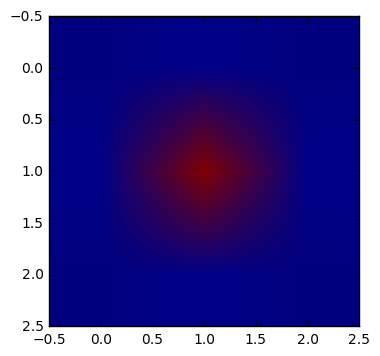

In [3]:
kernel = mutils.gauss_kernel(3, 0, 1)
print(np.array(kernel).dtype)
plt.imshow(np.array(kernel))
print(kernel.shape)

In [4]:
kernel.shape
kernel = np.expand_dims(kernel, axis = 2)
kernel = np.expand_dims(kernel, axis = 3)
print(kernel.shape)

(3, 3, 1, 1)


In [5]:
from keras.models import Sequential, Model
from gaussian_blur_layer import GaussBlurLayer

In [6]:
model = Sequential()
model.add(GaussBlurLayer(3, kernel, input_shape=(320, 160, 3)))

1
(3, 3, 1, 1)


In [7]:
model.get_config()

[{'class_name': 'GaussBlurLayer',
  'config': {'batch_input_shape': (None, 320, 160, 3),
   'input_dtype': 'float32',
   'name': 'gaussblurlayer_1',
   'trainable': True}}]

In [12]:
len(model.get_weights())

1

In [9]:
model.compile(optimizer=None, loss=None)

/home/ankur/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py:1811: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_1_model" was not an Input tensor, it was generated by layer gaussblurlayer_1.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: gaussblurlayer_input_1:0
  str(x.name))


TypeError: 'NoneType' object is not callable